<a href="https://colab.research.google.com/github/amadeomarvell/Logo-Detection/blob/main/DETR_with_FLICKR_47.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install torch==1.8.0 torchvision==0.9.0 -qq
!pip install torch torchvision -f https://download.pytorch.org/whl/cu111/torch_stable.html

Looking in links: https://download.pytorch.org/whl/cu111/torch_stable.html


## Setup DeepLogo2

In [2]:
!pip install -q yacs

In [3]:
!git clone https://github.com/satojkovic/DeepLogo2.git

Cloning into 'DeepLogo2'...
remote: Enumerating objects: 284, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 284 (delta 72), reused 69 (delta 69), pack-reused 208
Receiving objects: 100% (284/284), 1.10 MiB | 6.60 MiB/s, done.
Resolving deltas: 100% (131/131), done.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from zipfile import ZipFile

In [ ]:
with ZipFile('drive/MyDrive/FlickrLogos_47.zip', 'r') as TestZip: TestZip.extractall('DeepLogo2/FlickrLogos-47')

In [4]:
%%bash
cd DeepLogo2
wget http://image.ntua.gr/iva/datasets/flickr_logos/flickr_logos_27_dataset.tar.gz
#cp /content/drive/MyDrive/DeepLogo2/train_data/flickr_logos_27_dataset.tar.gz .
tar zxvf flickr_logos_27_dataset.tar.gz
cd flickr_logos_27_dataset
tar zxvf flickr_logos_27_dataset_images.tar.gz
cd ..

flickr_logos_27_dataset/
flickr_logos_27_dataset/flickr_logos_27_dataset_distractor_set_urls.txt
flickr_logos_27_dataset/flickr_logos_27_dataset_training_set_annotation.txt
flickr_logos_27_dataset/flickr_logos_27_dataset_query_set_annotation.txt
flickr_logos_27_dataset/flickr_logos_27_dataset_images.tar.gz
flickr_logos_27_dataset_images/
flickr_logos_27_dataset_images/2176584286.jpg
flickr_logos_27_dataset_images/3156402215.jpg
flickr_logos_27_dataset_images/3455836079.jpg
flickr_logos_27_dataset_images/4426526983.jpg
flickr_logos_27_dataset_images/2418409523.jpg
flickr_logos_27_dataset_images/2126991906.jpg
flickr_logos_27_dataset_images/13455389.jpg
flickr_logos_27_dataset_images/3209750863.jpg
flickr_logos_27_dataset_images/3334869821.jpg
flickr_logos_27_dataset_images/455131100.jpg
flickr_logos_27_dataset_images/3381786063.jpg
flickr_logos_27_dataset_images/3193687005.jpg
flickr_logos_27_dataset_images/2422219264.jpg
flickr_logos_27_dataset_images/339019736.jpg
flickr_logos_27_data

--2023-11-15 14:03:05--  http://image.ntua.gr/iva/datasets/flickr_logos/flickr_logos_27_dataset.tar.gz
Resolving image.ntua.gr (image.ntua.gr)... 147.102.11.1
Connecting to image.ntua.gr (image.ntua.gr)|147.102.11.1|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 101827904 (97M) [application/x-gzip]
Saving to: ‘flickr_logos_27_dataset.tar.gz’

     0K .......... .......... .......... .......... ..........  0% 58.1K 28m29s
    50K .......... .......... .......... .......... ..........  0%  174K 18m59s
   100K .......... .......... .......... .......... ..........  0%  349K 14m14s
   150K .......... .......... .......... .......... ..........  0%  349K 11m51s
   200K .......... .......... .......... .......... ..........  0%  349K 10m26s
   250K .......... .......... .......... .......... ..........  0%  349K 9m28s
   300K .......... .......... .......... .......... ..........  0%  132M 8m7s
   350K .......... .......... .......... .......... ..........  0%  349K

In [5]:
%%bash
cd DeepLogo2
python preproc_annot.py

Num. of annots: 4536
Skip with size 0: 2662264721.jpg
Num. of preprocessed annots: 808(images)
Num. of annotations: 646(train) 162(test)
Created: flickr_logos_27_dataset/flickr_logos_27_dataset_training_set_annotation_cropped.txt
Created: flickr_logos_27_dataset/flickr_logos_27_dataset_test_set_annotation_cropped.txt


In [ ]:
%%bash
cd DeepLogo2
python flickr2coco.py --mode train --output_dir flickr_logos_27_dataset
python flickr2coco.py --mode test --output_dir flickr_logos_27_dataset

## Visualize data

In [ ]:
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import os

In [ ]:
coco = COCO('/content/DeepLogo2/flickr_logos_27_dataset/flickr_logos_27_train.json')

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [ ]:
# load and display image
catIds = coco.getCatIds(catNms=['Intel'])
imgIds = coco.getImgIds(catIds=catIds)

In [ ]:
print(catIds)
print(imgIds)

[12]
[642, 10, 12, 530, 275, 162, 175, 51, 437, 569, 446, 67, 325, 585, 463, 599, 221, 352, 240, 368, 116, 121]


Image id 51
Image name: DeepLogo2/flickr_logos_27_dataset/flickr_logos_27_dataset_images/145116964.jpg


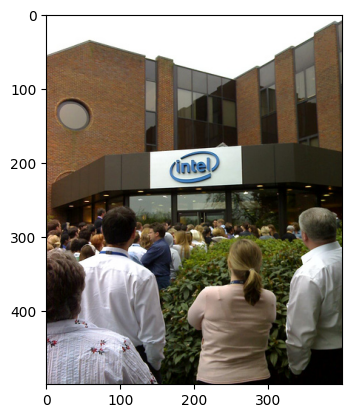

In [ ]:
img_id = imgIds[np.random.randint(0,len(imgIds))]
print('Image id {}'.format(img_id))

img = coco.loadImgs(img_id)[0]

img_name = os.path.join('DeepLogo2', 'flickr_logos_27_dataset', 'flickr_logos_27_dataset_images', img['file_name'])
print('Image name: {}'.format(img_name))

I = io.imread(img_name)
plt.figure()
plt.imshow(I)

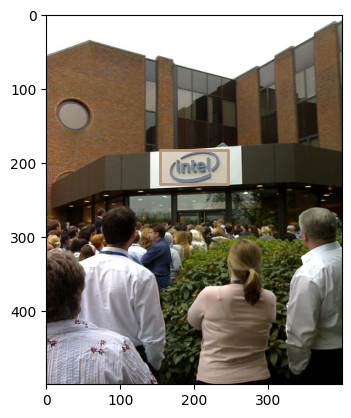

In [ ]:
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds)
anns = coco.loadAnns(annIds)

plt.imshow(I)
coco.showAnns(anns, draw_bbox=True)

## Setup detr

In [ ]:
import torch

In [ ]:
%%bash
cd DeepLogo2
python delete_head_and_save.py

Downloading: "https://dl.fbaipublicfiles.com/detr/detr-r50-e632da11.pth" to /root/.cache/torch/hub/checkpoints/detr-r50-e632da11.pth
100%|██████████| 159M/159M [00:00<00:00, 175MB/s]


## Train!!

In [ ]:
%cd DeepLogo2

/content/DeepLogo2


In [ ]:
!python detr/main.py \
  --dataset_file "flickr_logos_27" \
  --coco_path "flickr_logos_27_dataset" \
  --output_dir "outputs" \
  --resume "detr-r50_no-class-head.pth" \
  --epochs 100

Streaming output truncated to the last 5000 lines.
Epoch: [19]  [230/323]  eta: 0:00:35  lr: 0.000100  class_error: 100.00  loss: 8.6049 (8.2216)  loss_ce: 0.5044 (0.5506)  loss_bbox: 0.3726 (0.3820)  loss_giou: 0.3288 (0.4300)  loss_ce_0: 0.5965 (0.5699)  loss_bbox_0: 0.3982 (0.4203)  loss_giou_0: 0.3022 (0.4377)  loss_ce_1: 0.5456 (0.5629)  loss_bbox_1: 0.3954 (0.3802)  loss_giou_1: 0.3919 (0.4162)  loss_ce_2: 0.5486 (0.5711)  loss_bbox_2: 0.3944 (0.3796)  loss_giou_2: 0.4138 (0.4156)  loss_ce_3: 0.5592 (0.5671)  loss_bbox_3: 0.4381 (0.3697)  loss_giou_3: 0.3341 (0.4031)  loss_ce_4: 0.5432 (0.5630)  loss_bbox_4: 0.3819 (0.3796)  loss_giou_4: 0.3240 (0.4230)  loss_ce_unscaled: 0.5044 (0.5506)  class_error_unscaled: 100.0000 (99.2142)  loss_bbox_unscaled: 0.0745 (0.0764)  loss_giou_unscaled: 0.1644 (0.2150)  cardinality_error_unscaled: 1.0000 (1.3247)  loss_ce_0_unscaled: 0.5965 (0.5699)  loss_bbox_0_unscaled: 0.0796 (0.0841)  loss_giou_0_unscaled: 0.1511 (0.2188)  cardinality_error_0_

## Display results

In [ ]:
from detr.util.plot_utils import plot_logs

from pathlib import Path

log_directory = [Path('outputs/')]

/content/DeepLogo2/detr/util/plot_utils.py:65: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['test_coco_eval_bbox'], dtype='object')
  df.interpolate().ewm(com=ewm_col).mean().plot(


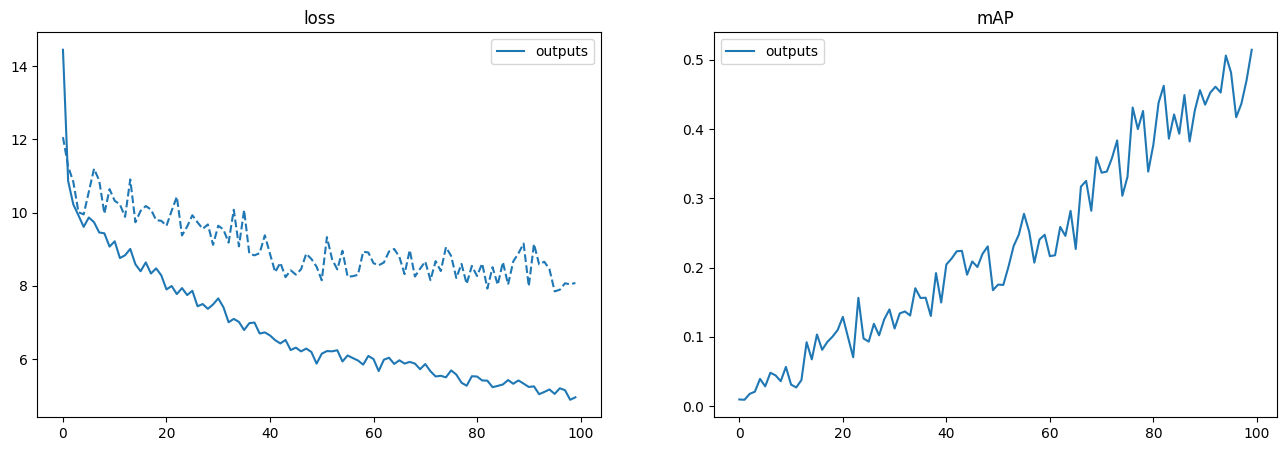

In [ ]:
fields_of_interest = (
    'loss',
    'mAP',
    )

plot_logs(log_directory,
          fields_of_interest)

/content/DeepLogo2/detr/util/plot_utils.py:65: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['test_coco_eval_bbox'], dtype='object')
  df.interpolate().ewm(com=ewm_col).mean().plot(
/content/DeepLogo2/detr/util/plot_utils.py:65: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['test_coco_eval_bbox'], dtype='object')
  df.interpolate().ewm(com=ewm_col).mean().plot(


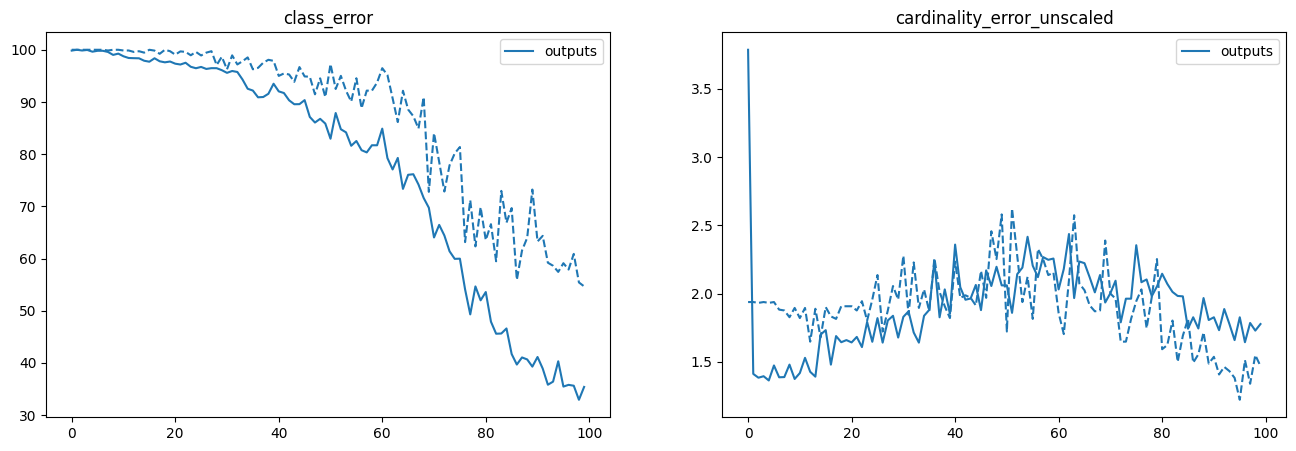

In [ ]:
fields_of_interest = (
    'class_error',
    'cardinality_error_unscaled',
    )

plot_logs(log_directory,
          fields_of_interest)

In [ ]:
!ls outputs

checkpoint0099.pth  checkpoint.pth  eval  log.txt


In [ ]:
model = torch.hub.load('facebookresearch/detr',
                       'detr_resnet50',
                       pretrained=False,
                       num_classes=27)

checkpoint = torch.load('outputs/checkpoint.pth',
                        map_location='cpu')

model.load_state_dict(checkpoint['model'],
                      strict=False)

model.eval();

Downloading: "https://github.com/facebookresearch/detr/zipball/main" to /root/.cache/torch/hub/main.zip
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
COLORS = [[0.000, 0.447, 0.741], [0.850, 0.325, 0.098], [0.929, 0.694, 0.125],
          [0.494, 0.184, 0.556], [0.466, 0.674, 0.188], [0.301, 0.745, 0.933]]

In [ ]:
import config

In [ ]:
cfg = config.get_cfg_defaults()

In [ ]:
finetuned_classes = cfg.CLASS_NAMES

In [ ]:
import torchvision.transforms as T

# standard PyTorch mean-std input image normalization
transform = T.Compose([
    T.Resize(800),
    T.ToTensor(),
    T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# for output bounding box post-processing
def box_cxcywh_to_xyxy(x):
    x_c, y_c, w, h = x.unbind(1)
    b = [(x_c - 0.5 * w), (y_c - 0.5 * h),
         (x_c + 0.5 * w), (y_c + 0.5 * h)]
    return torch.stack(b, dim=1)

def rescale_bboxes(out_bbox, size):
    img_w, img_h = size
    b = box_cxcywh_to_xyxy(out_bbox)
    b = b * torch.tensor([img_w, img_h, img_w, img_h], dtype=torch.float32)
    return b

In [ ]:
def plot_finetuned_results(pil_img, prob=None, boxes=None, save_dir=None, image_name=None):
    plt.figure(figsize=(16,10))
    plt.imshow(pil_img)
    ax = plt.gca()
    colors = COLORS * 100
    if prob is not None and boxes is not None:
      for p, (xmin, ymin, xmax, ymax), c in zip(prob, boxes.tolist(), colors):
          ax.add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                    fill=False, color=c, linewidth=3))
          cl = p.argmax()
          text = f'{finetuned_classes[cl]}: {p[cl]:0.2f}'
          ax.text(xmin, ymin, text, fontsize=15,
                  bbox=dict(facecolor='yellow', alpha=0.5))
    plt.axis('off')
    if save_dir is not None and image_name is not None:
      plt.savefig(os.path.join(save_dir, image_name))
    plt.show()

In [ ]:
def filter_bboxes_from_outputs(outputs,
                               threshold=0.7):

  # keep only predictions with confidence above threshold
  probas = outputs['pred_logits'].softmax(-1)[0, :, :-1]
  keep = probas.max(-1).values > threshold

  probas_to_keep = probas[keep]

  # convert boxes from [0; 1] to image scales
  bboxes_scaled = rescale_bboxes(outputs['pred_boxes'][0, keep], im.size)

  return probas_to_keep, bboxes_scaled

In [ ]:
def run_workflow(my_image, my_model, save_dir, image_name):
  # mean-std normalize the input image (batch-size: 1)
  img = transform(my_image).unsqueeze(0)

  # propagate through the model
  outputs = my_model(img)

  for threshold in [0.8]: #[0.9, 0.7]:

    probas_to_keep, bboxes_scaled = filter_bboxes_from_outputs(outputs,
                                                              threshold=threshold)

    plot_finetuned_results(my_image,
                           probas_to_keep,
                           bboxes_scaled, save_dir, image_name)


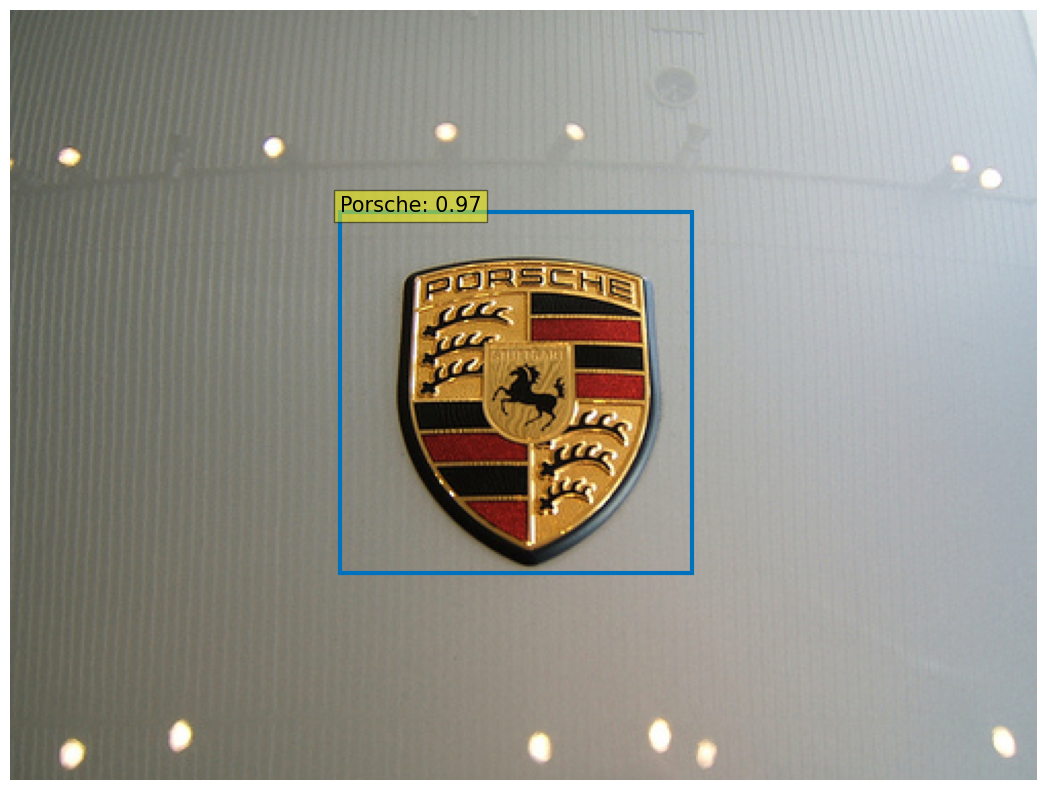

In [ ]:
from PIL import Image

#img_name = '/content/DeepLogo2/flickr_logos_27_dataset/flickr_logos_27_dataset_images/4763207899.jpg'
img_name = '/content/DeepLogo2/flickr_logos_27_dataset/flickr_logos_27_dataset_images/1690276845.jpg'

im = Image.open(img_name)

run_workflow(im,
            model, None, None)

## Inference with all test images

In [ ]:
import json

In [ ]:
with open('flickr_logos_27_dataset/flickr_logos_27_test.json', 'r') as f:
  test_data = json.load(f)

In [ ]:
test_image_names = [d['file_name'] for d in test_data['images']]

In [ ]:
save_dir = '/content/drive/MyDrive/DeepLogo2/result_images_epoch100_model'
if not os.path.exists(save_dir):
  os.makedirs(save_dir)

In [ ]:
for test_image_name in test_image_names:
  test_image_full_name = os.path.join(cfg.IMAGE_DIR, test_image_name)
  im = Image.open(test_image_full_name)
  run_workflow(im, model, save_dir, test_image_name)